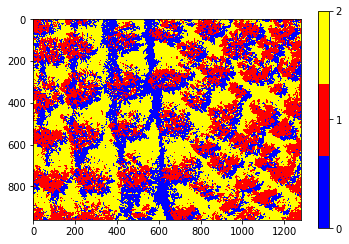

In [35]:
# -*- coding: utf-8 -*-
import dataiku
import pandas as pd, numpy as np
from dataiku import pandasutils as pdu
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import colors

# Read recipe inputs
spectral_Features_Normalized = dataiku.Dataset("Spectral_Features_Normalized")
spectral_Features_Normalized_df = spectral_Features_Normalized.get_dataframe()
pixel_Mask = dataiku.Dataset("Pixel_Mask")
pixel_Mask_df = pixel_Mask.get_dataframe()

# Clustering
Nc = 2
kmeans = KMeans(n_clusters=Nc,).fit(np.array(spectral_Features_Normalized_df))
Mask = np.array(pixel_Mask_df)
Mask[Mask==1] = kmeans.labels_
plt.imshow(Mask,cmap=colors.ListedColormap(['blue','red','yellow']))
plt.colorbar(orientation ='vertical',ticks=range(0,Nc))
plt.show()

kmeans_Clustering_df = pd.DataFrame(Mask) # Compute a Pandas dataframe to write into KMeans_Clustering


# Write recipe outputs
kmeans_Clustering = dataiku.Dataset("KMeans_Clustering")
kmeans_Clustering.write_with_schema(kmeans_Clustering_df)